<a id = "backtop"> </a>
# Table of Content

1. [Task 1](#Chapter1)  
   1.1 [Question 1](#Chapter1.1)  
   1.2 [Question 2](#Chapter1.2)  
   1.3 [Question 3](#Chapter1.3)
2. [Task 2](#Chapter2)  
   2.1 [Question 1](#Chapter2.1)  
   2.2 [Question 2](#Chapter2.2)  
   2.3 [Question 3](#Chapter2.3)

<a id = "Chapter1"> </a>
# Task 1

In [377]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
csv_file = 'trends1.csv'
dst = pd.read_csv(csv_file)

In [3]:
dst

,Unnamed: 0,top 1,top 2,top 3,date
0,0,4,14,14,2012-10-07
1,1,7,15,18,2012-10-14
2,2,5,12,15,2012-10-21
3,3,5,15,12,2012-10-28
4,4,4,12,12,2012-11-04
...,...,...,...,...,...
256,256,18,72,35,2017-09-03
257,257,17,67,37,2017-09-10
258,258,18,66,32,2017-09-17
259,259,19,62,31,2017-09-24


In [4]:
dst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  261 non-null    int64 
 1   top 1       261 non-null    int64 
 2   top 2       261 non-null    int64 
 3   top 3       261 non-null    int64 
 4   date        261 non-null    object
dtypes: int64(4), object(1)
memory usage: 10.3+ KB


In [5]:
dst['date']= pd.to_datetime(dst['date'])

In [6]:
dst['Year'] = dst['date'].dt.year
dst['Month'] = dst['date'].dt.month

In [7]:
dst.drop(dst.columns[[0]], axis=1, inplace = True)

In [8]:
dst

,top 1,top 2,top 3,date,Year,Month
0,4,14,14,2012-10-07,2012,10
1,7,15,18,2012-10-14,2012,10
2,5,12,15,2012-10-21,2012,10
3,5,15,12,2012-10-28,2012,10
4,4,12,12,2012-11-04,2012,11
...,...,...,...,...,...,...
256,18,72,35,2017-09-03,2017,9
257,17,67,37,2017-09-10,2017,9
258,18,66,32,2017-09-17,2017,9
259,19,62,31,2017-09-24,2017,9


In [9]:
dst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   top 1   261 non-null    int64         
 1   top 2   261 non-null    int64         
 2   top 3   261 non-null    int64         
 3   date    261 non-null    datetime64[ns]
 4   Year    261 non-null    int64         
 5   Month   261 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 12.4 KB


In [10]:
dst_gp_m = dst.copy()
dst_gp_m = dst_gp_m.groupby(['Year','Month']).mean()
dst_gp_m

top 1  top 2  top 3
Year Month                     
2012 10      5.25  14.00  14.75
     11      4.75  13.00  12.25
     12      5.00  13.40  12.20
2013 1       4.25  14.00  13.75
     2       3.75  17.50  14.25
...           ...    ...    ...
2017 6      18.50  93.50  40.25
     7      20.00  90.40  37.60
     8      18.75  74.50  35.25
     9      18.00  66.75  33.75
     10     20.00  78.00  27.00

[61 rows x 3 columns]

In [11]:
print(dst_gp_m.to_string())

            top 1  top 2  top 3
Year Month                     
2012 10      5.25  14.00  14.75
     11      4.75  13.00  12.25
     12      5.00  13.40  12.20
2013 1       4.25  14.00  13.75
     2       3.75  17.50  14.25
     3       4.60  17.20  15.60
     4       4.50  15.75  16.00
     5       3.50  17.50  14.75
     6       3.80  16.80  13.80
     7       4.00  16.00  14.25
     8       4.25  17.75  15.75
     9       4.40  17.00  15.00
     10      5.75  16.00  16.00
     11      4.50  15.00  14.50
     12      4.20  12.80  13.60
2014 1       4.75  15.00  15.25
     2       4.00  17.50  15.75
     3       4.20  20.80  18.00
     4       4.00  20.00  19.25
     5       4.50  19.75  22.25
     6       3.80  20.60  23.60
     7       4.50  21.75  26.50
     8       4.80  20.00  20.20
     9       5.25  18.50  18.75
     10      4.25  19.50  18.50
     11      4.60  15.40  16.20
     12      5.75  13.75  16.75
2015 1       5.25  17.25  15.75
     2       4.50  20.00  20.00
     3  

In [12]:
dst_gp_y = dst.copy()
dst_gp_y.drop('Month', axis=1, inplace = True)
dst_gp_y = dst_gp_y.groupby(['Year']).mean()
dst_gp_y

,top 1,top 2,top 3
Year,,,
2012,5.000000,13.461538,13.000000
2013,4.288462,16.096154,14.750000
2014,4.519231,18.596154,19.269231
2015,10.326923,23.634615,24.230769
2016,23.557692,61.826923,30.384615
2017,19.850000,75.850000,33.575000


In [13]:
year = [2012, 2013, 2014, 2015, 2016, 2017]
dst_gp_y['Year'] = year

In [14]:
dst_gp_y

,top 1,top 2,top 3,Year
Year,,,,
2012,5.000000,13.461538,13.000000,2012
2013,4.288462,16.096154,14.750000,2013
2014,4.519231,18.596154,19.269231,2014
2015,10.326923,23.634615,24.230769,2015
2016,23.557692,61.826923,30.384615,2016
2017,19.850000,75.850000,33.575000,2017


In [15]:
plt.style.use("fivethirtyeight")
fig1, ax = plt.subplots(1, 1, figsize = (12, 8), dpi= 100)

width = 0.2

label = dst_gp_y["Year"]
x = np.arange(len(label))

bar1 = ax.bar(x - width, dst_gp_y['top 1'], width = width, label = 'Top 1', edgecolor = "white", color = '#FF5833')
bar2 = ax.bar(x, dst_gp_y['top 2'], width = width, label = 'Top 2', edgecolor = "white", color = '#339FFF')
bar3 = ax.bar(x + width, dst_gp_y['top 3'], width = width, label = 'Top 3', edgecolor = "white", color = '#8EDD54')

ax.set_xlabel("Year", fontsize = 14, labelpad = 20)
ax.set_ylabel("Performance Score (%)", fontsize = 14, labelpad = 20)
ax.set_title("Annual Performance Scores for Different Tops", fontsize = 16, pad = 20)
ax.legend()

ax.set_xticks(x)
ax.set_xticklabels(label)

plt.close()

In [16]:
dst_gp_ma = dst_gp_m.iloc[39:51]
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
dst_gp_ma['Month'] = month
dst_gp_ma

C:\Users\US\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


top 1  top 2  top 3  Month
Year Month                            
2016 1      25.60  25.20  24.80      1
     2      27.25  33.50  29.25      2
     3      27.75  44.50  30.75      3
     4      25.75  55.00  33.00      4
     5      23.40  68.60  36.00      5
     6      22.00  85.25  37.50      6
     7      22.60  92.60  35.80      7
     8      20.50  82.75  30.75      8
     9      21.75  80.25  28.75      9
     10     22.00  62.20  27.20     10
     11     23.00  56.50  25.75     11
     12     21.25  55.25  24.50     12

In [17]:
plt.style.use("fivethirtyeight")
fig2, ax = plt.subplots(1, 1, figsize = (12, 8), dpi= 100)

width = 0.2

label = dst_gp_ma['Month']
x = np.arange(len(label))

bar1 = ax.bar(x - width, dst_gp_ma['top 1'], width = width, label = 'Top 1', edgecolor = "white", color = '#FF5833')
bar2 = ax.bar(x, dst_gp_ma['top 2'], width = width, label = 'Top 2', edgecolor = "white", color = '#339FFF')
bar3 = ax.bar(x + width, dst_gp_ma['top 3'], width = width, label = 'Top 3', edgecolor = "white", color = '#8EDD54')

ax.set_xlabel("Month", fontsize = 14, labelpad = 20)
ax.set_ylabel("Performance Score (%)", fontsize = 14, labelpad = 20)
ax.set_title("Performance Scores for Different Tops in 2016", fontsize = 16, pad = 20)
ax.legend()

ax.set_xticks(x)
ax.set_xticklabels(label)

plt.close()

##### [Back to Top](#backtop)

<a id = "Chapter1.1"> </a>
## 1.1 Question 1

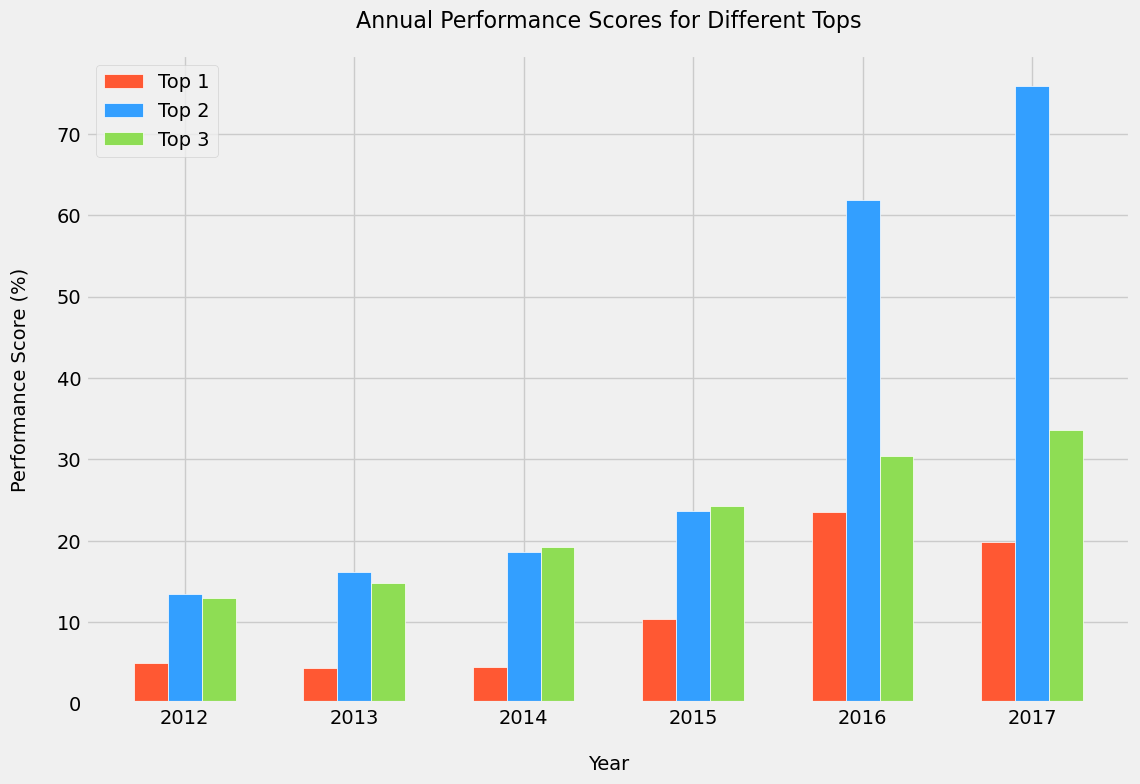

,top 1,top 2,top 3,Year
Year,,,,
2012,5.000000,13.461538,13.000000,2012
2013,4.288462,16.096154,14.750000,2013
2014,4.519231,18.596154,19.269231,2014
2015,10.326923,23.634615,24.230769,2015
2016,23.557692,61.826923,30.384615,2016
2017,19.850000,75.850000,33.575000,2017


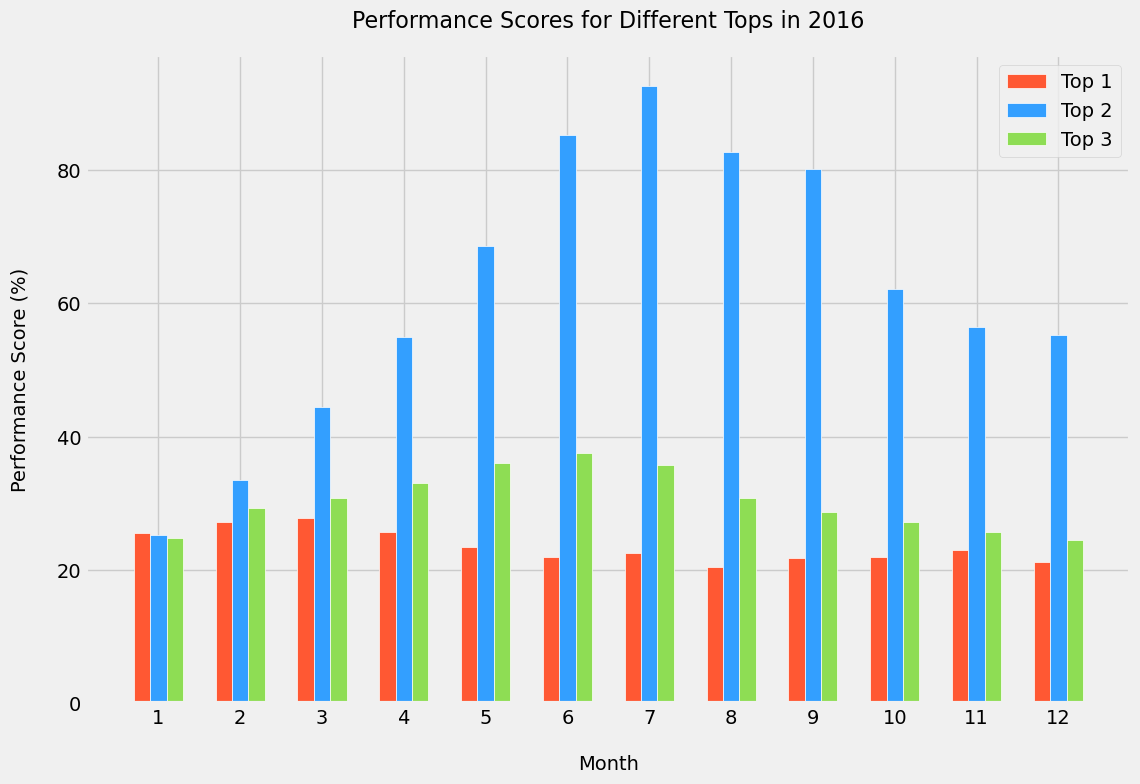

top 1  top 2  top 3  Month
Year Month                            
2016 1      25.60  25.20  24.80      1
     2      27.25  33.50  29.25      2
     3      27.75  44.50  30.75      3
     4      25.75  55.00  33.00      4
     5      23.40  68.60  36.00      5
     6      22.00  85.25  37.50      6
     7      22.60  92.60  35.80      7
     8      20.50  82.75  30.75      8
     9      21.75  80.25  28.75      9
     10     22.00  62.20  27.20     10
     11     23.00  56.50  25.75     11
     12     21.25  55.25  24.50     12

In [18]:
complete_figure = [fig1, fig2]
complete_table = [dst_gp_y, dst_gp_ma]

fig_count = 0

while fig_count < 2:
    display (complete_figure[fig_count])
    display (complete_table[fig_count])
    fig_count += 1

## Analysis for Fisrt Graph

---
The first graph shows the Annual Performance Scores for the 3 tops. The calculation is simple, the mean of performance scores in the whole year was taken into account for the 6 respective years. From the graph:  
1. Top 2 had been experiencing a steady albeit minimal increase in the first 4 years and an exponential increase after that.
2. Top 3 had been experiencing a steady increase in perfromance score throught the years as well but it was not as favourable as Top 2.
3. Top 1 on the other hand had been flatuating throughout the years and was generally relatively unfavorable as it has the lowest scores.

In conclusion, Top 2 was generally the most favourable piece throught the 6 years.

---

## Analysis for Second Graph

---

The second graph took into a deep look into the performance in 2016. The year 2017 was not taken because it wasn't a complete year. The calculation is simple, the mean of the performance scores for each month was taken into account for this analysis. From the graph:

1. All 3 pieces of tops were experiencing flactuations in general regarding their scores.
2. Top 2 and 3 peaked around mid-year (around June and July).
3. Top 1 was still the lowest in terms of performances throught the year.

In conclusion, Top 2 was the best in the year 2016.

---

##### [Back to Top](#backtop)

<a id = "Chapter1.2"> </a>
## 1.2 Question 2

In [19]:
dst_gp_mo = dst_gp_m.copy()
dst_gp_mo = dst_gp_m.iloc[48:60]
dst_gp_mo

top 1  top 2  top 3
Year Month                     
2016 10     22.00  62.20  27.20
     11     23.00  56.50  25.75
     12     21.25  55.25  24.50
2017 1      21.80  48.80  25.80
     2      19.75  58.75  27.00
     3      21.00  72.50  31.25
     4      21.20  86.20  35.00
     5      18.75  91.25  38.50
     6      18.50  93.50  40.25
     7      20.00  90.40  37.60
     8      18.75  74.50  35.25
     9      18.00  66.75  33.75

In [20]:
top1p = dst_gp_mo['top 1'].values.tolist()
top2p = dst_gp_mo['top 2'].values.tolist()
top3p = dst_gp_mo['top 3'].values.tolist()

In [21]:
class last_12m:
    def __init__(self, val1 = {}, val2 = {}, val3 = {}):
            self.val1 = val1
            self.val2 = val2
            self.val3 = val3
            
    def ave_score(self):
        
        mean_c = [self.val1, self.val2, self.val3]
        mean_r = [0, 0, 0]
        
        counter = 0
        
        while counter < 3:
            mean_r[counter] = mean(mean_c[counter])
            mean_r[counter] = "{:.2f}".format(mean_r[counter])
            counter += 1
            
        return mean_r


    
class perf_12m:
    def __init__(self, result = {}):
            self.result = result
            
    def print_dict(self):
        
        dic_result = {"top1:": "Top 1's performance for the last 12 months is " + self.result[0] + '%',
                      "top2:": "Top 2's performance for the last 12 months is " + self.result[1] + '%',
                      "top3:": "Top 3's performance for the last 12 months is " + self.result[2] + '%'}
        
        dictionary_items = dic_result.items()
        
        for item in dictionary_items:
            print(item)

##### [Back to Top](#backtop)

<a id = "Chapter1.3"> </a>
## 1.3 Question 3

In [22]:
ave_cal = last_12m(top1p, top2p, top3p)
myresult = ave_cal.ave_score()
myresult

['20.33', '71.38', '31.82']

In [23]:
print_result = perf_12m(myresult)
myprint = print_result.print_dict()

('top1:', "Top 1's performance for the last 12 months is 20.33%")
('top2:', "Top 2's performance for the last 12 months is 71.38%")
('top3:', "Top 3's performance for the last 12 months is 31.82%")


##### [Back to Top](#backtop)

<a id = "Chapter2"> </a>
# Task 2

In [49]:
csv_file = 'predictions.csv'
dst_p = pd.read_csv(csv_file)

In [50]:
dst_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  626 non-null    int64  
 1   date        626 non-null    object 
 2   fit top 1   626 non-null    float64
 3   fit top 2   626 non-null    float64
 4   fit top 3   626 non-null    float64
 5   fit2 top 3  626 non-null    float64
 6   fit3 top 3  626 non-null    float64
 7   fit2 top 2  626 non-null    float64
 8   fit3 top 2  626 non-null    float64
 9   fit2 top 1  626 non-null    float64
 10  fit3 top 1  626 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 53.9+ KB


In [51]:
dst_p

,Unnamed: 0,date,fit top 1,fit top 2,fit top 3,fit2 top 3,fit3 top 3,fit2 top 2,fit3 top 2,fit2 top 1,fit3 top 1
0,0,2012-10-07,6.464020,14.918372,12.852700,17.560586,16.691433,21.967562,19.348604,6.676299,6.814028
1,1,2012-10-14,6.405044,14.879459,13.460605,17.584433,16.864402,20.428943,18.149665,6.553469,6.678460
2,2,2012-10-21,5.594880,12.766397,12.500809,16.287381,15.672930,17.533925,15.621429,5.685904,5.801919
3,3,2012-10-28,4.556118,9.883558,11.040882,14.667064,14.128378,14.478612,13.020325,4.598339,4.706192
4,4,2012-11-04,4.203193,8.345088,10.553082,14.029395,13.566908,12.894532,11.970428,4.200978,4.297650
...,...,...,...,...,...,...,...,...,...,...,...
621,621,2018-09-27,16.588328,98.782168,36.344867,36.316258,36.037766,73.258258,64.549945,17.507205,17.533665
622,622,2018-09-28,16.655365,98.884051,36.503322,36.415425,36.139121,73.103604,64.319097,17.567572,17.594394
623,623,2018-09-29,16.724295,99.019655,36.689969,36.538825,36.265359,72.967858,64.104769,17.629760,17.656862
624,624,2018-09-30,16.794364,99.184409,36.900044,36.682254,36.412168,72.847916,63.903832,17.693017,17.720324


In [52]:
dst_p['date']= pd.to_datetime(dst_p['date'])
dst_p['Year'] = dst_p['date'].dt.year
dst_p['Month'] = dst_p['date'].dt.month

In [53]:
dst_p

,Unnamed: 0,date,fit top 1,fit top 2,fit top 3,fit2 top 3,fit3 top 3,fit2 top 2,fit3 top 2,fit2 top 1,fit3 top 1,Year,Month
0,0,2012-10-07,6.464020,14.918372,12.852700,17.560586,16.691433,21.967562,19.348604,6.676299,6.814028,2012,10
1,1,2012-10-14,6.405044,14.879459,13.460605,17.584433,16.864402,20.428943,18.149665,6.553469,6.678460,2012,10
2,2,2012-10-21,5.594880,12.766397,12.500809,16.287381,15.672930,17.533925,15.621429,5.685904,5.801919,2012,10
3,3,2012-10-28,4.556118,9.883558,11.040882,14.667064,14.128378,14.478612,13.020325,4.598339,4.706192,2012,10
4,4,2012-11-04,4.203193,8.345088,10.553082,14.029395,13.566908,12.894532,11.970428,4.200978,4.297650,2012,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,621,2018-09-27,16.588328,98.782168,36.344867,36.316258,36.037766,73.258258,64.549945,17.507205,17.533665,2018,9
622,622,2018-09-28,16.655365,98.884051,36.503322,36.415425,36.139121,73.103604,64.319097,17.567572,17.594394,2018,9
623,623,2018-09-29,16.724295,99.019655,36.689969,36.538825,36.265359,72.967858,64.104769,17.629760,17.656862,2018,9
624,624,2018-09-30,16.794364,99.184409,36.900044,36.682254,36.412168,72.847916,63.903832,17.693017,17.720324,2018,9


In [55]:
dst_p.drop(dst_p.columns[[0]], axis=1, inplace = True)

In [56]:
dst_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        626 non-null    datetime64[ns]
 1   fit top 1   626 non-null    float64       
 2   fit top 2   626 non-null    float64       
 3   fit top 3   626 non-null    float64       
 4   fit2 top 3  626 non-null    float64       
 5   fit3 top 3  626 non-null    float64       
 6   fit2 top 2  626 non-null    float64       
 7   fit3 top 2  626 non-null    float64       
 8   fit2 top 1  626 non-null    float64       
 9   fit3 top 1  626 non-null    float64       
 10  Year        626 non-null    int64         
 11  Month       626 non-null    int64         
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 58.8 KB


In [57]:
dst_p

,date,fit top 1,fit top 2,fit top 3,fit2 top 3,fit3 top 3,fit2 top 2,fit3 top 2,fit2 top 1,fit3 top 1,Year,Month
0,2012-10-07,6.464020,14.918372,12.852700,17.560586,16.691433,21.967562,19.348604,6.676299,6.814028,2012,10
1,2012-10-14,6.405044,14.879459,13.460605,17.584433,16.864402,20.428943,18.149665,6.553469,6.678460,2012,10
2,2012-10-21,5.594880,12.766397,12.500809,16.287381,15.672930,17.533925,15.621429,5.685904,5.801919,2012,10
3,2012-10-28,4.556118,9.883558,11.040882,14.667064,14.128378,14.478612,13.020325,4.598339,4.706192,2012,10
4,2012-11-04,4.203193,8.345088,10.553082,14.029395,13.566908,12.894532,11.970428,4.200978,4.297650,2012,11
...,...,...,...,...,...,...,...,...,...,...,...,...
621,2018-09-27,16.588328,98.782168,36.344867,36.316258,36.037766,73.258258,64.549945,17.507205,17.533665,2018,9
622,2018-09-28,16.655365,98.884051,36.503322,36.415425,36.139121,73.103604,64.319097,17.567572,17.594394,2018,9
623,2018-09-29,16.724295,99.019655,36.689969,36.538825,36.265359,72.967858,64.104769,17.629760,17.656862,2018,9
624,2018-09-30,16.794364,99.184409,36.900044,36.682254,36.412168,72.847916,63.903832,17.693017,17.720324,2018,9


In [77]:
dst_p_gp = dst_p.copy()
dst_p_gp = dst_p.groupby(['Year','Month']).mean().reset_index()
dst_p_gp['Date'] = pd.to_datetime(dst_p_gp.assign(Day = 1).loc[:, ['Year','Month','Day']])

In [78]:
dst_p_gp

,Year,Month,fit top 1,fit top 2,fit top 3,fit2 top 3,fit3 top 3,fit2 top 2,fit3 top 2,fit2 top 1,fit3 top 1,Date
0,2012,10,5.755016,13.111947,12.463749,16.524866,15.839286,18.602261,16.535006,5.878503,6.000150,2012-10-01
1,2012,11,5.428707,9.752933,11.704611,14.827010,14.522483,13.903530,13.840885,5.356069,5.431922,2012-11-01
2,2012,12,5.948125,8.029548,9.730182,12.096328,12.315548,11.808571,12.998270,5.675017,5.695157,2012-12-01
3,2013,1,6.529270,8.118225,11.773971,13.445924,14.209143,12.483182,13.853127,6.111906,6.075371,2013-01-01
4,2013,2,5.645324,11.790157,13.631167,14.445908,15.322559,16.065901,17.618843,5.178063,5.106981,2013-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...
68,2018,6,15.697004,106.723235,43.340545,43.772180,43.953543,90.609365,88.664642,16.701088,16.798593,2018-06-01
69,2018,7,16.125648,108.508767,42.593004,43.017256,43.173517,90.614713,86.711461,17.233806,17.276058,2018-07-01
70,2018,8,15.633321,103.170540,40.227162,40.573588,40.600767,81.833488,75.732888,16.767274,16.772305,2018-08-01
71,2018,9,15.934155,100.566332,37.914747,38.091437,37.875788,76.450642,68.465279,16.925763,16.941434,2018-09-01


In [79]:
dst_p_gp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Year        73 non-null     int64         
 1   Month       73 non-null     int64         
 2   fit top 1   73 non-null     float64       
 3   fit top 2   73 non-null     float64       
 4   fit top 3   73 non-null     float64       
 5   fit2 top 3  73 non-null     float64       
 6   fit3 top 3  73 non-null     float64       
 7   fit2 top 2  73 non-null     float64       
 8   fit3 top 2  73 non-null     float64       
 9   fit2 top 1  73 non-null     float64       
 10  fit3 top 1  73 non-null     float64       
 11  Date        73 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 7.0 KB


In [83]:
dst_t_m = dst.copy()
dst_t_m = dst_t_m.groupby(['Year','Month']).mean().reset_index()
dst_t_m['Date'] = pd.to_datetime(dst_t_m.assign(Day = 1).loc[:, ['Year','Month','Day']])

In [84]:
dst_t_m

,Year,Month,top 1,top 2,top 3,Date
0,2012,10,5.25,14.00,14.75,2012-10-01
1,2012,11,4.75,13.00,12.25,2012-11-01
2,2012,12,5.00,13.40,12.20,2012-12-01
3,2013,1,4.25,14.00,13.75,2013-01-01
4,2013,2,3.75,17.50,14.25,2013-02-01
...,...,...,...,...,...,...
56,2017,6,18.50,93.50,40.25,2017-06-01
57,2017,7,20.00,90.40,37.60,2017-07-01
58,2017,8,18.75,74.50,35.25,2017-08-01
59,2017,9,18.00,66.75,33.75,2017-09-01


In [85]:
dst_t_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    61 non-null     int64         
 1   Month   61 non-null     int64         
 2   top 1   61 non-null     float64       
 3   top 2   61 non-null     float64       
 4   top 3   61 non-null     float64       
 5   Date    61 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 3.0 KB


In [148]:
plt.style.use('default')


fig4, ax1 = plt.subplots(1, 1, figsize = (12, 8), dpi= 100)

ax1.plot(dst_t_m['Date'], dst_t_m['top 1'], label = "Trend", color = '#FF5833')
ax1.plot(dst_p_gp['Date'], dst_p_gp['fit top 1'], label = "Fitted Model 1", color = '#339FFF')
ax1.plot(dst_p_gp['Date'], dst_p_gp['fit2 top 1'], label = "Fitted Model 2", color = '#8EDD54')
ax1.plot(dst_p_gp['Date'], dst_p_gp['fit3 top 1'], label = "Fitted Model 3", color = '#9961CB')
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.set_xlabel("Timestamp", fontsize = 14, labelpad = 20)
ax1.set_ylabel("Performance Score (%)", fontsize = 14, labelpad = 20)
ax1.set_title("Performance Score Predictions for Top 1", fontsize = 16, pad = 20)
ax1.legend()
ax1.grid(True)
plt.xticks(rotation = 90)

plt.close()



fig5, ax1 = plt.subplots(1, 1, figsize = (12, 8), dpi= 100)

ax1.plot(dst_t_m['Date'], dst_t_m['top 2'], label = "Trend", color = '#FF5833')
ax1.plot(dst_p_gp['Date'], dst_p_gp['fit top 2'], label = "Fitted Model 1", color = '#339FFF')
ax1.plot(dst_p_gp['Date'], dst_p_gp['fit2 top 2'], label = "Fitted Model 2", color = '#8EDD54')
ax1.plot(dst_p_gp['Date'], dst_p_gp['fit3 top 2'], label = "Fitted Model 3", color = '#9961CB')
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.set_xlabel("Timestamp", fontsize = 14, labelpad = 20)
ax1.set_ylabel("Performance Score (%)", fontsize = 14, labelpad = 20)
ax1.set_title("Performance Score Predictions for Top 2", fontsize = 16, pad = 20)
ax1.legend()
ax1.grid(True)
plt.xticks(rotation = 90)

plt.close()



fig6, ax1 = plt.subplots(1, 1, figsize = (12, 8), dpi= 100)

ax1.plot(dst_t_m['Date'], dst_t_m['top 3'], label = "Trend", color = '#FF5833')
ax1.plot(dst_p_gp['Date'], dst_p_gp['fit top 3'], label = "Fitted Model 1", color = '#339FFF')
ax1.plot(dst_p_gp['Date'], dst_p_gp['fit2 top 3'], label = "Fitted Model 2", color = '#8EDD54')
ax1.plot(dst_p_gp['Date'], dst_p_gp['fit3 top 3'], label = "Fitted Model 3", color = '#9961CB')
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
ax1.set_xlabel("Timestamp", fontsize = 14, labelpad = 20)
ax1.set_ylabel("Performance Score (%)", fontsize = 14, labelpad = 20)
ax1.set_title("Performance Score Predictions for Top 3", fontsize = 16, pad = 20)
ax1.legend()
ax1.grid(True)
plt.xticks(rotation = 90)

plt.close()

##### [Back to Top](#backtop)

<a id = "Chapter2.1"> </a>
## 2.1 Question 1

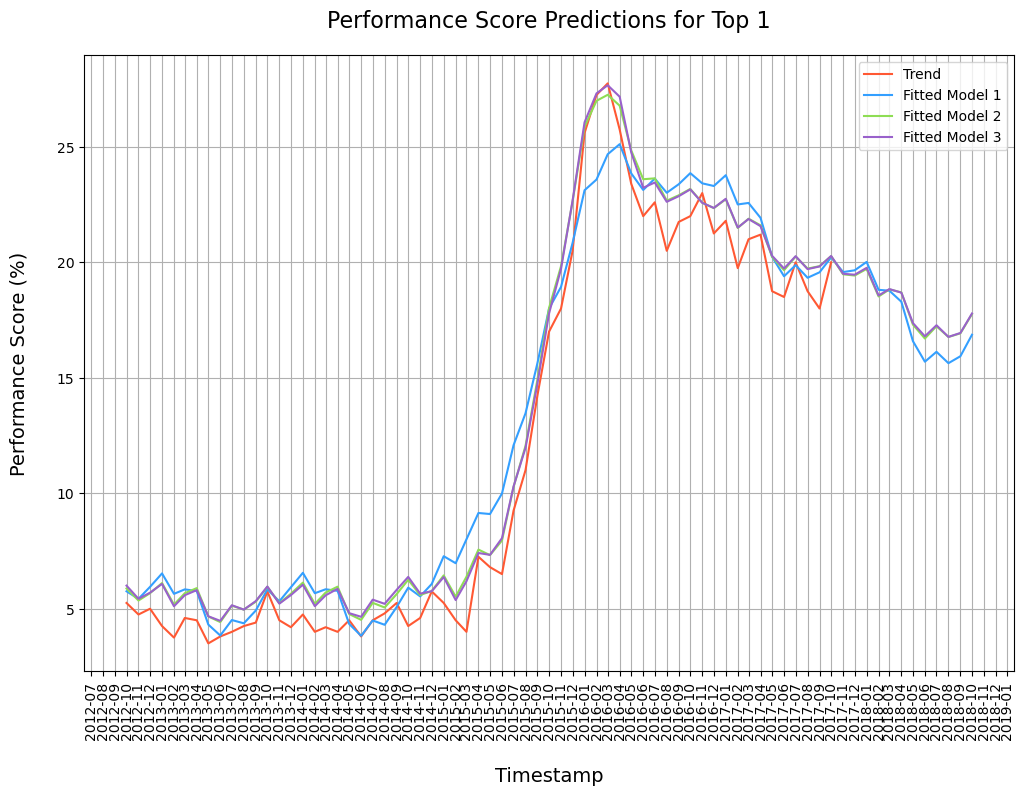

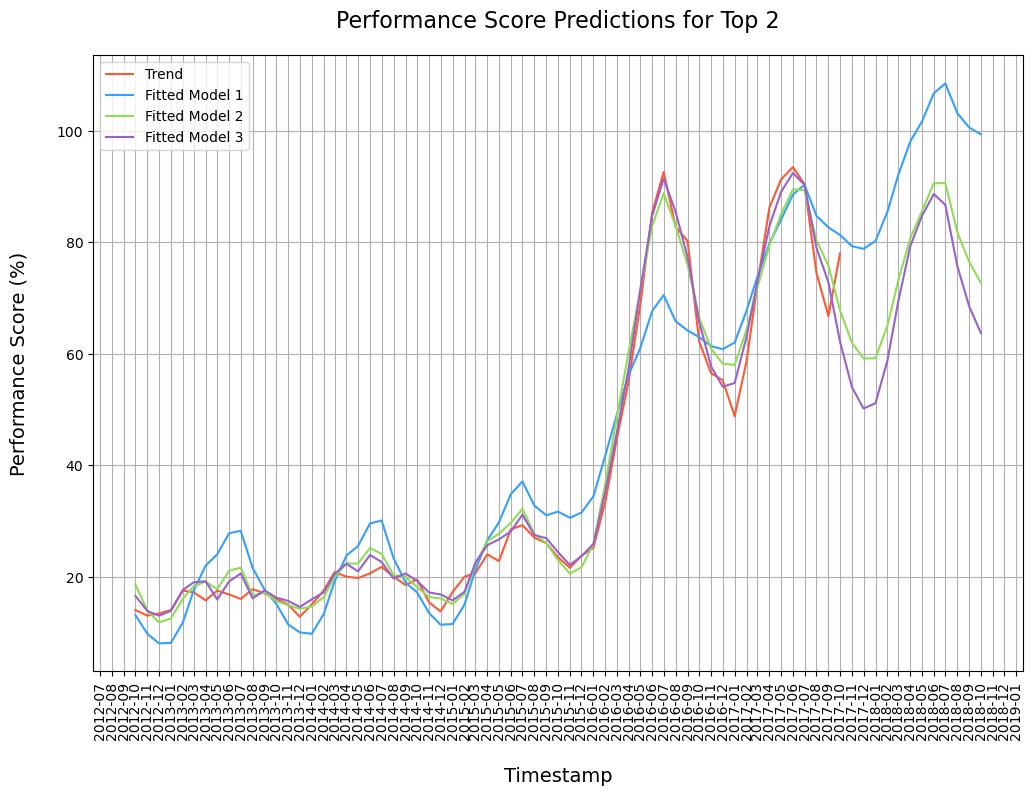

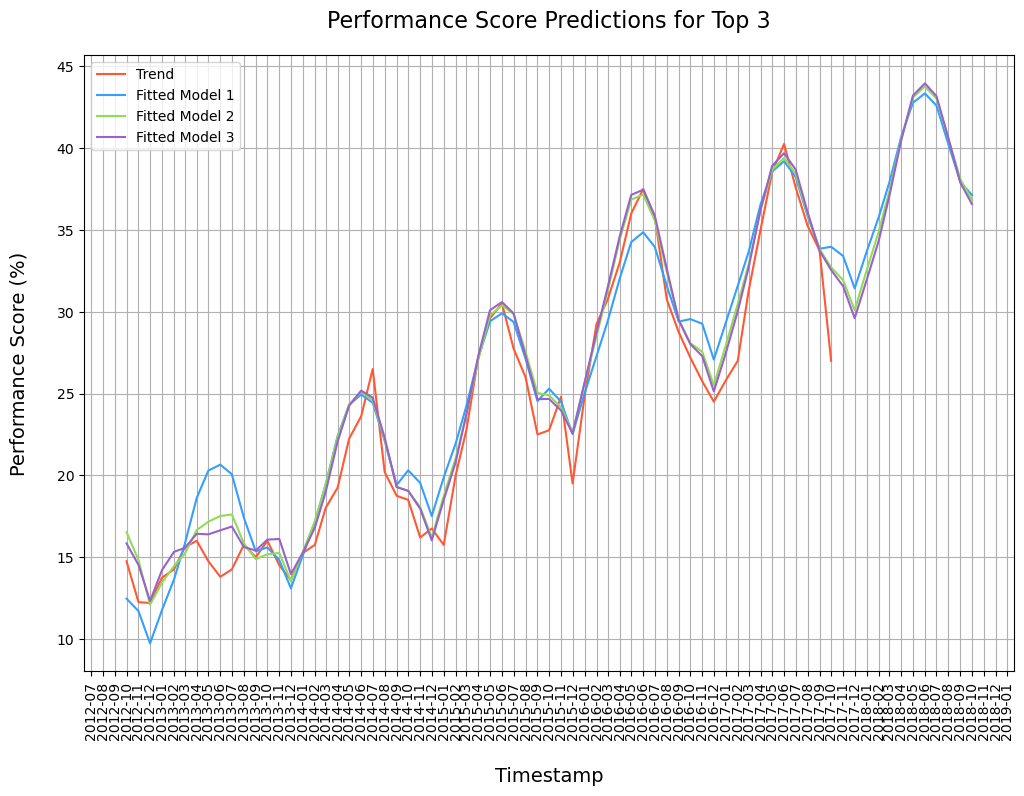

In [151]:
complete_figure2 = [fig4, fig5, fig6]

fig_count = 0

while fig_count < 3:
    display (complete_figure2[fig_count])
    fig_count += 1

## Analysis on the Fitted Models

---

The general rule of thumb is that the closer the model fit tot original data, the better the model performance is.
1. For Top 1, Model 3 seemed to be the best fitas it closely followed the trend of the original data (flactuations i.e.). However, Model 2 would have been a close second.
2. Again, Model 3 was a better fit for Top 2. It was more obvious this time as the other models seemed to not quite follow the trend of the original data as closely.
3. Model 3 was still the best for Top 3. Although in this case, it became slightly worrying that the model don't quite follow the trends in the original data, but it was still good nonetheless.

In conclusion, Model 3 seemed to be the best fir for all 3 tops in general.

---

##### [Back to Top](#backtop)

<a id = "Chapter2.2"> </a>
## 2.2 Question 2

1. According to the fitted model 3, Top 1 will be experiencing a steady drop in the next 12 months in general.
2. According to the fitted model 3, Top 2 will be experiencing a steady drop in the next 3 months (approx.) but will rise up steadily and peak around June/July, then again fall steadily afterwards.
3. According to the fitted model 3, Top 3 will first drop in the next 2 months, rising up and peaking around June/July (similar to Top 2 as discussed in previous section) and dropping down afterwards.

##### [Back to Top](#backtop)

<a id = "Chapter2.3"> </a>
## 2.3 Question 3

## Random Forest Regression for Top 1

In [378]:
dst_t_m['Date2'] = dst_t_m['Date'].map(dt.datetime.toordinal)

In [379]:
x = dst_t_m.iloc[:, -1].values
y = dst_t_m.iloc[:, 2].values
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [380]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

<ipython-input-380-19c84054ec94>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

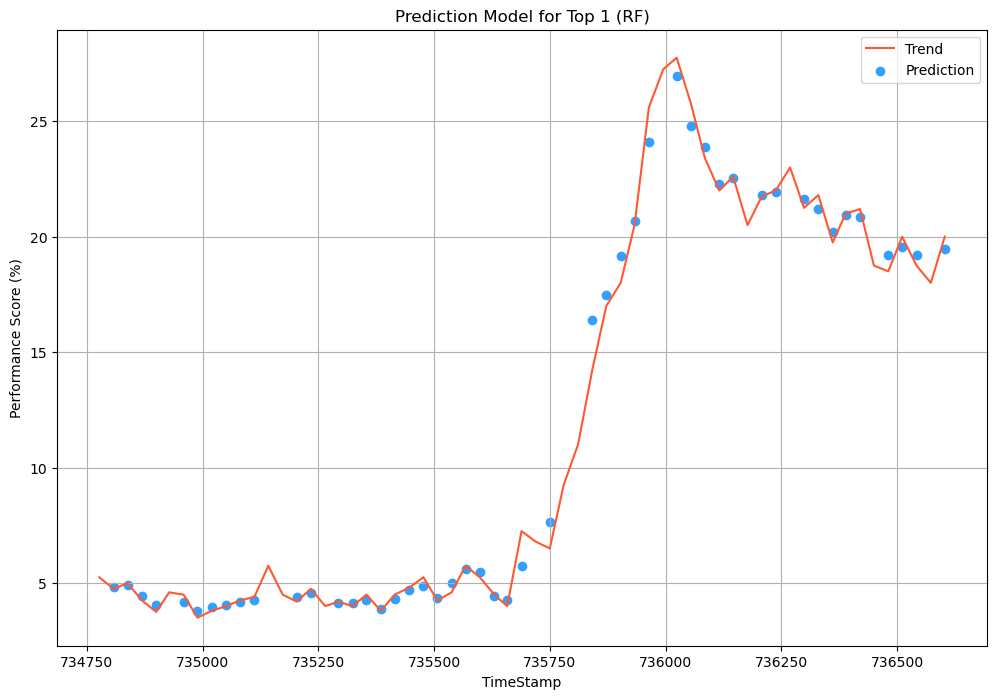

In [381]:
fig = plt.subplots(1, 1, figsize = (12, 8), dpi= 100)
plt.plot(x, y, label = "Trend", color = '#FF5833')
plt.scatter(x_train, regressor.predict(x_train), label = "Prediction", color = '#339FFF')
plt.title('Prediction Model for Top 1 (RF)')
plt.xlabel('TimeStamp')
plt.ylabel('Performance Score (%)')
plt.legend()
plt.grid()
plt.show()

## Random Forest Regression for Top 2

In [382]:
x = dst_t_m.iloc[:, -1].values
y = dst_t_m.iloc[:, 3].values
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [383]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

<ipython-input-383-19c84054ec94>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

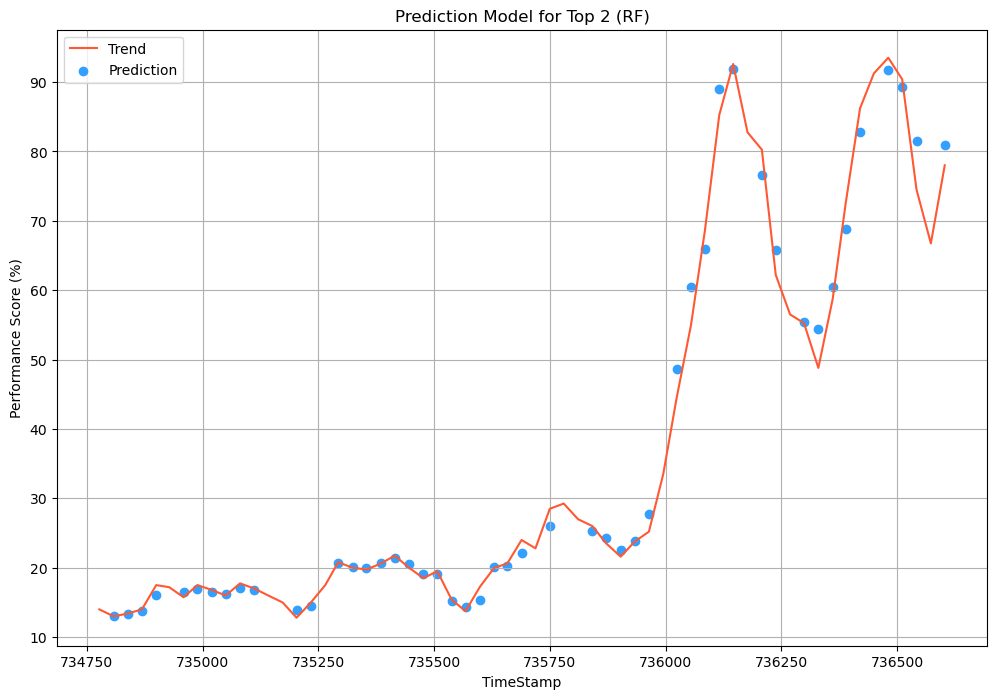

In [384]:
fig = plt.subplots(1, 1, figsize = (12, 8), dpi= 100)
plt.plot(x, y, label = "Trend", color = '#FF5833')
plt.scatter(x_train, regressor.predict(x_train), label = "Prediction", color = '#339FFF')
plt.title('Prediction Model for Top 2 (RF)')
plt.xlabel('TimeStamp')
plt.ylabel('Performance Score (%)')
plt.legend()
plt.grid()
plt.show()

## Random Forest Regression for Top 3

In [385]:
x = dst_t_m.iloc[:, -1].values
y = dst_t_m.iloc[:, 4].values
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [386]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

<ipython-input-386-19c84054ec94>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

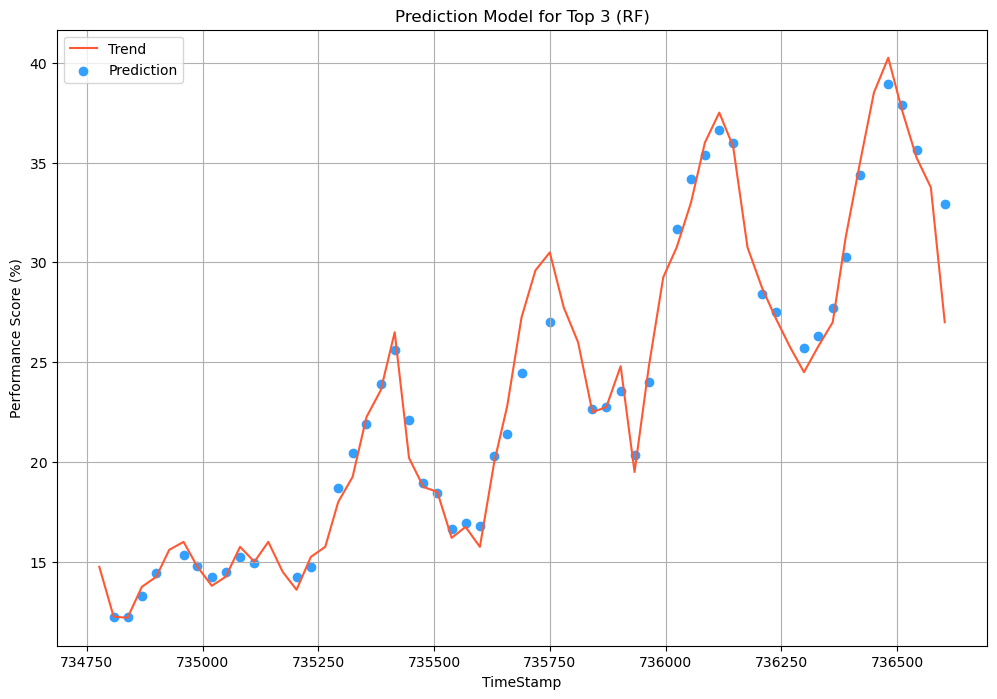

In [387]:
fig = plt.subplots(1, 1, figsize = (12, 8), dpi= 100)
plt.plot(x, y, label = "Trend", color = '#FF5833')
plt.scatter(x_train, regressor.predict(x_train), label = "Prediction", color = '#339FFF')
plt.title('Prediction Model for Top 3 (RF)')
plt.xlabel('TimeStamp')
plt.ylabel('Performance Score (%)')
plt.legend()
plt.grid()
plt.show()

A few models such as Decision Tree or SVR were also tested but Random Forest seemed to outperformed all other models and hence it was chosen.

##### [Back to Top](#backtop)